# Miscellaneous plots and code

*Authors: Enze Chen and Mark Asta (University of California, Berkeley)*

In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
from matplotlib.artist import Artist

from sklearn.linear_model import LinearRegression

from pymatgen.ext.matproj import MPRester
from pymatgen.core.periodic_table import Element

## 3D bars

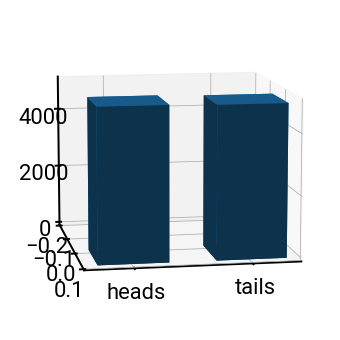

In [32]:
outcomes = ['heads', 'tails']
flips = [4983, 5017]

fig = plt.figure(figsize=(6,6))
ax = plt.axes(projection ='3d')
x = -0.3
ax.bar3d([x, x+1], 0, 0, 2*abs(x), 0.1, flips)
ax.view_init(10, 80)

ax.set_xticks([1, 0])
ax.set_xticklabels(outcomes)
ax.set_ylim(-0.2, 0.1)
plt.show()

## Anscombe's quartet

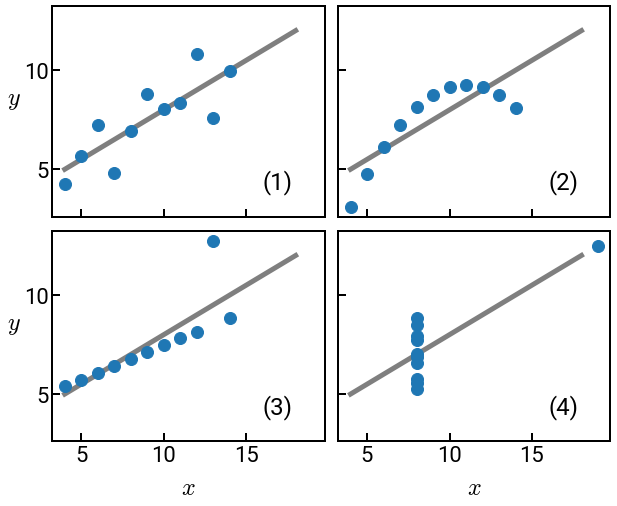

In [77]:
df = pd.read_csv('../../data/week_1/03/anscombe.csv',
                 names=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4'])

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,8), sharex=True, sharey=True)
for i in range(4):
    x = df[f'x{i+1}'].to_numpy()
    y = df[f'y{i+1}'].to_numpy()
    model = LinearRegression()
    model.fit(x.reshape(-1, 1), y)
    xx = np.linspace(4, 18, 100)
    yy = model.predict(xx.reshape(-1,1))
    ax[i // 2, i % 2].scatter(x, y)
    ax[i // 2, i % 2].plot(xx, yy, alpha=0.5, c='k', zorder=-5)
    ax[i // 2, i % 2].text(x=16, y=4, s=f'({i+1})', size=24)

ax[1, 0].set_xlabel('$x$')
ax[1, 1].set_xlabel('$x$')
ax[1, 0].set_ylabel('$y$', rotation=0)
ax[0, 0].set_ylabel('$y$', rotation=0)
fig.subplots_adjust(hspace=0.07, wspace=0.05)
plt.show()
fig.savefig('../week_1/03/anscombe.png')

## Gradient descent animation

In [125]:
data = np.load('../../data/week_1/01/number_weight.npy')
m = len(data)
X = np.column_stack([np.ones(m), data[:, 0]])
y = data[:, 1].reshape(-1, 1)
theta = np.zeros((2, 1))
alpha = 1e-5
err = np.sum((X @ theta - y)**2) / (2*m)

fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
h, = ax.plot([], [], c='k', alpha=0.5)
t = ax.text(0, 0, '')
plt.tight_layout()
plt.close()

def init():
    h.set_data([], [])
    return h,
    
def animate(i):
    global err, theta, X, y, ax, t
    h.set_data(data[:, 0], X @ theta)
    Artist.remove(t)
    t = ax.text(2, 100, s=f'error = {err:.3f}', fontsize=18, ha='left', 
                bbox=dict(fc='1.0', ec='white'))
    
    theta = theta - alpha * (X.T @ (X @ theta - y))
    err = np.sum((X @ theta - y)**2) / (2*m)
    return h, t

plt.rcParams.update({'animation.html': 'jshtml', 'figure.figsize':(6, 4)})
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=20, interval=500, repeat=False);
anim

## Gather element data for ML

In [14]:
nums = np.arange(1, 101)
symbol = []
long_name = []
mass = []
radius = []
row = []
group = []
is_metal = []
X = []
density = []
melting = []
vol = []
n = []
resist = []
thermal_cond = []
youngs = []
poisson = []
for i in nums:
    e = Element.from_Z(i)
    symbol.append(e.name)
    long_name.append(e.long_name)
    mass.append(e.atomic_mass)
    radius.append(e.atomic_radius)
    row.append(e.row)
    group.append(e.group)
    is_metal.append(e.is_metal)
    X.append(e.X)
    density.append(e.density_of_solid)
    melting.append(e.melting_point)
    vol.append(e.molar_volume)
    n.append(e.refractive_index)
    resist.append(e.electrical_resistivity)
    thermal_cond.append(e.thermal_conductivity)
    youngs.append(e.youngs_modulus)
    poisson.append(e.poissons_ratio)
    
df = pd.DataFrame({
    'symbol': symbol,
    'name': long_name,
    'atomic_number':nums,
    'atomic_mass': mass,
    'atomic_radius': radius,
    'row': row,
    'group': group,
    'is_metal': is_metal,
    'electronegativity': X,
    'density_solid': density,
    'melting_point': melting,
    'molar_volume': vol,
    'refractive_index': n,
    'elec_resist': resist,
    'therm_cond': thermal_cond,
    'youngs_mod': youngs,
    'poissons_ratio': poisson
})
df.to_csv('../../data/week_1/04/elem_props.csv', index=False)
df.head()

,symbol,name,atomic_number,atomic_mass,atomic_radius,row,group,is_metal,electronegativity,density_solid,melting_point,molar_volume,refractive_index,elec_resist,therm_cond,youngs_mod,poissons_ratio
0,H,Hydrogen,1,1.007940,0.25,1,1,False,2.20,NaN,14.01,11.42,1.000132 (gas; liquid 1.12)(no units),NaN,0.1805,NaN,NaN
1,He,Helium,2,4.002602,NaN,1,18,False,NaN,NaN,0.95,21.00,1.000035 (gas; liquid 1.028)(no units),NaN,0.1513,NaN,NaN
2,Li,Lithium,3,6.941000,1.45,2,1,True,0.98,535.0,453.69,13.02,None,9.500000e-08,85.0000,4.9,NaN
3,Be,Beryllium,4,9.012182,1.05,2,2,True,1.57,1848.0,1560.0,4.85,None,3.800000e-08,190.0000,287.0,0.032
4,B,Boron,5,10.811000,0.85,2,13,False,2.04,2460.0,2349.0,4.39,None,1.000000e+12,27.0000,NaN,NaN


## Modify the Citrination data

In [34]:
filepath = '../../data/week_1/02/band_gaps_sc.json'
with open(filepath, 'r') as f:   # same as any other text file
    materials = json.load(f)     # special function from the json package!
print(len(materials))
    
# materials[0]
bg_materials = []
for m in materials:
    for p in m['properties']:
        if p['name'] == 'Band gap':
#             bg_materials.append(m)
            p['scalars'] = p['scalars'][0]['value']

# with open(filepath, 'w') as f:
#     json.dump(bg_materials, f, indent=4)

1447
1447
